# AccelerateAI: Ordinal Logistic Regression

## Ordinal Regression

**Diamond dataset analysis**

* carat weight of the diamond (0.2--5.01)
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond colour, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table width of top of diamond relative to widest point (43--95)
* x length in mm (0--10.74)
* y width in mm (0--58.9)
* z depth in mm (0--31.8)
* price price in US dollars (\$326--\$18,823)

This is another Ordered example where there are more sequences for Outcome category. 
- Fair
- Good
- Very Good
- Premium
- Ideal

Since there are 5 categories, there will be 4 thresholds / tau-cuts to be considered. 

We will observe these many intercepts/thresholds in the model output as well.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype

from statsmodels.miscmodels.ordinal_model import OrderedModel

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./diamonds.csv') 

df.sample(6)

,id,carat,cut,color,clarity,depth,table,price,x,y,z
9083,9084,1.07,Premium,G,SI2,62.0,59.0,4523,6.54,6.50,4.04
29365,29366,0.31,Premium,G,VS2,62.6,57.0,698,4.32,4.30,2.70
43151,43152,0.52,Ideal,G,SI1,61.3,55.0,1389,5.20,5.24,3.20
36542,36543,0.40,Premium,F,SI1,62.7,57.0,945,4.70,4.68,2.94
3785,3786,0.75,Ideal,E,VS1,62.0,55.0,3462,5.83,5.88,3.66
29475,29476,0.32,Premium,E,VS2,62.6,58.0,702,4.36,4.40,2.74


In [3]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [4]:
cat_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)
df["cut"] = df["cut"].astype(cat_type)

In [5]:
df['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [6]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x','y','z'],axis=1,inplace=True)

In [7]:
df.sample(4)

,id,carat,cut,color,clarity,depth,table,price,volume
17873,17874,1.40,Ideal,H,SI2,61.2,56.0,7213,228.929274
296,297,0.70,Fair,G,VVS1,58.8,66.0,2797,117.919760
48426,48427,0.71,Very Good,H,SI2,63.7,56.0,1972,113.993270
2318,2319,0.79,Ideal,H,SI1,61.4,56.0,3167,129.001220


Text(0.5, 1.0, 'Distribution by Volume')

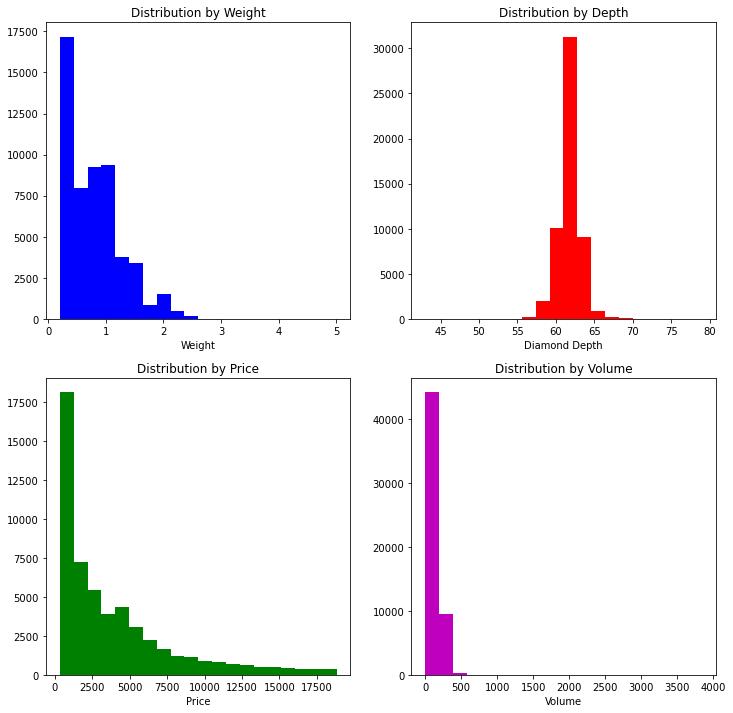

In [8]:
# Plot distributions - by Weight, by Depth, by Price, by Volume
 
plt.figure(figsize=[12,12])
 
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='b')
plt.xlabel('Weight')
plt.title('Distribution by Weight')
 
plt.subplot(222)
plt.hist(df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')
 
plt.subplot(223)
plt.hist(df['price'],bins=20,color='g')
plt.xlabel('Price')
plt.title('Distribution by Price')
 
plt.subplot(224)
plt.hist(df['volume'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

## 1. Probit Model

In [9]:
mod_prob = OrderedModel(df['cut'],
                        df[['volume', 'price', 'carat']],
                        distr='probit')

In [10]:
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35
                             OrderedModel Results                             
Dep. Variable:                    cut   Log-Likelihood:                -73850.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Sat, 17 Sep 2022                                         
Time:                        12:10:28                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

- We have considered 3 features: Volume, Price and Carat
- There are Intercepts with 5 categories for "Cut" which is the Outcome/Target
    - Since there are 5 categories in the target variable(fair, good, ideal, very good, premium), we have four thresholds to estimate.
    - The first estimated threshold is the actual value
    - All the other thresholds are in terms of cumulative exponentiated increments

In [11]:
# Fair/Good : -1.8589

In [12]:
# Exponentiated Increment can be added from 2nd threshold value onwards
-1.8589 + np.exp(-0.3292)

# Good/Ideal : -1.1394

-1.1394008974643732

In [13]:
-1.1394 + np.exp(-0.2053)

# Ideal/Very Good : -0.3249

-0.3249970411280453

In [14]:
-0.3249 + np.exp(-0.4986)

# Ideal/Very Good : 0.2824

0.28248039731376146

## 2. Logit Model

In [15]:
mod_log = OrderedModel(df['cut'],
                        df[['volume', 'price', 'carat']],
                        distr='logit')                      # Distribution instance

In [16]:
res_log = mod_log.fit(method='bfgs', disp=False)          # Broyden-Fletcher-Goldfarb-Shanno (BFGS)
print(res_log.summary())

                             OrderedModel Results                             
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Sat, 17 Sep 2022                                         
Time:                        12:10:33                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   

Similarly we can compute for thresholds and compute to interpret.